In [1]:
#RuntimeError: Failed to process string with tex because latex could not be found
import platform,socket,re,uuid,json,psutil,sys
from datetime import datetime

def getSystemInfo():
    try:
        info = {}
        now = datetime.now()
        info['date-time'] = now.strftime("%d/%m/%Y %H:%M:%S")  # today.strftime("%B %d, %Y")
        # info['time']=today.strftime("%B %d, %Y")
        info['platform'] = platform.system()
        info['Node Name'] = platform.node()
        info['platform-release'] = platform.release()
        info['Physical cores'] = psutil.cpu_count(logical=False)
        info['Total cores'] = psutil.cpu_count(logical=True)
        info['Physical cores'] = psutil.cpu_count(logical=False)
        info['Total cores'] = psutil.cpu_count(logical=True)
        # CPU frequencies
        cpufreq = psutil.cpu_freq()
        info['processor'] = platform.processor()
        info['Max Frequency'] = f'{cpufreq.max:.2f}Mhz'
        info['Min Frequency'] = f'{cpufreq.min:.2f}Mhz'
        info['Current Frequency'] = f'{cpufreq.current:.2f}Mhz'
        info['ram'] = str(round(psutil.virtual_memory().total / (1024.0 ** 3))) + " GB"
        info['python'] = sys.version
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

print(getSystemInfo())

{"date-time": "05/10/2020 22:50:09", "platform": "Linux", "Node Name": "intel-20200429-102802", "platform-release": "4.9.0-12-amd64", "Physical cores": 8, "Total cores": 16, "processor": "", "Max Frequency": "0.00Mhz", "Min Frequency": "0.00Mhz", "Current Frequency": "2200.00Mhz", "ram": "126 GB", "python": "3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) \n[GCC 7.3.0]"}


In [2]:
import matplotlib
import matplotlib.pyplot as plt

import matplotlib as mpl

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial

    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:#, msg:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

    
def plotting6(y_ax,method_name,matrix_size,title):
    xlabel=['','','','','','']
    x=[0,0,0]
    if method_name[0]=='rsvd(ov)':
        x[0]=-0.01
    if method_name[0]=='rsvd(def)':
        x[0]=-0.02
    if method_name[1]=='rsvd(ov)':
        x[1]=-0.01
    if method_name[1]=='rsvd(def)':
        x[1]=-0.02
    if method_name[2]=='rsvd(ov)':
        x[2]=-0.01
    if method_name[2]=='rsvd(def)':
        x[2]=-0.02

    xlabel[0]=r"diag($U_{svd}^TU_{" + method_name[0] + "}$).diag($V_{svd}^TV_{"+method_name[0]+"}$)"
    xlabel[1]=r"$\{\sigma_{svd}^i-\sigma_{"+method_name[0]+"}^i\}_{i=1}^{100}$"    
    
    xlabel[2]=r"diag($U_{svd}^TU_{" + method_name[1] + "}$).diag($V_{svd}^TV_{"+method_name[1]+"}$)"
    xlabel[3]=r"$\{\sigma_{svd}^i-\sigma_{"+method_name[1]+"}^i\}_{i=1}^{100}$"    
    
    xlabel[4]=r"diag($U_{svd}^TU_{" + method_name[2] + "}$).diag($V_{svd}^TV_{"+method_name[2]+"}$)"
    xlabel[5]=r"$\{\sigma_{svd}^i-\sigma_{"+method_name[2]+"}^i\}_{i=1}^{100}$"    
    
    
    fig, axs = plt.subplots(3,2 , sharex=True,figsize=(8,12))
    fig.subplots_adjust(hspace=0.35)
    fig.subplots_adjust(wspace=0.3)
    #fig.suptitle(title)

    axs[0][0].tick_params(axis='both', labelsize='large')
    axs[0][1].tick_params(axis='both', labelsize='large')
    axs[1][0].tick_params(axis='both', labelsize='large')
    axs[1][1].tick_params(axis='both', labelsize='large')
    axs[2][0].tick_params(axis='both', labelsize='large')
    axs[2][1].tick_params(axis='both', labelsize='large')

    
    axs[0][0].plot(y_ax[0], 'tab:green')
    
    axs[0][1].plot(y_ax[1],'tab:blue')
    yhat = savitzky_golay(y_ax[1], 51, 3)
    axs[0][1].plot(yhat, 'tab:red')

    axs[1][0].plot(y_ax[2],'tab:green')
    yhat = savitzky_golay(y_ax[2], 51, 3)
    axs[1][0].plot(yhat, 'tab:red')
    
    axs[1][1].plot(y_ax[3],'tab:blue')
    yhat = savitzky_golay(y_ax[3], 51, 3)
    axs[1][1].plot(yhat, 'tab:red')
    
    axs[2][0].plot(y_ax[4],'tab:green')
    yhat = savitzky_golay(y_ax[4], 51, 3)
    axs[2][0].plot(yhat, 'tab:red')
    
    axs[2][1].plot(y_ax[5],'tab:blue')
    yhat = savitzky_golay(y_ax[5], 51, 3)
    axs[2][1].plot(yhat, 'tab:red')
    

    fig.text(.12+x[0],0.65,xlabel[0],size=15,va='center')
    fig.text(.64,0.65,xlabel[1],size=16,va='center')
    fig.text(.12+x[1],0.375,xlabel[2],size=15,va='center')
    fig.text(.64,0.375,xlabel[3],size=16,va='center')
    fig.text(.12+x[1],0.09,xlabel[4],size=15,va='center')
    fig.text(.64,0.09,xlabel[5],size=16,va='center')

    
    fig.text(.28,0.89,"(a)",size=16,va='center')
    fig.text(.71,0.89,"(b)",size=16,va='center')
    fig.text(.28,0.61,"(c)",size=16,va='center')
    fig.text(.71,0.61,"(d)",size=16,va='center')
    fig.text(.28,0.34,"(e)",size=16,va='center')
    fig.text(.71,0.34,"(f)",size=16,va='center')

    
    filename=f'all_methods_r{matrix_size[0]}_c{matrix_size[1]}_rank{matrix_size[2]}'
    plt.savefig(filename+'.pdf', bbox_inches='tight') 




In [3]:

import time
from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eigh
import numpy as np
from numpy import linalg as LA
import math
import sys
#from hurry.filesize import size

#np.set_printoptions(precision=2)
l=1 # number of executions of each algorithm

def create_matrix(m,n,rank):
    mu, sigma = 0, 10
    U, R =LA.qr(np.random.normal(mu, sigma, (m, rank)))  # randn(m, k)
    V, R =LA.qr(np.random.normal(mu, sigma, (n, rank)))  # randn(m, k)
    A = np.matmul(U, np.matmul(R,V.T))
    print('\n\nSize of matrix in memory:',sys.getsizeof(A))
    return A


In [4]:

from scipy.linalg import eigh_tridiagonal
from scipy.linalg import eigh
import numpy as np
from numpy import linalg as LA
import math

def partialGKbidiag(A,k):
    l,n= np.shape(A) #memory: O(l*n)
    delta=1e-10
    rank=k   
    Q  = np.zeros((l,k+1),dtype= np.float64) #memory: O(l*k)
    P  = np.zeros((n,k), dtype=np.float64) #memory: O(n*k)
    q = np.ones((l,1),dtype=np.float64)+np.ones((l,1),dtype=np.float64)
    p = np.zeros((n,1),dtype=np.float64)
    alpha_ar=np.zeros((k,),dtype= np.float64)
    beta_ar=np.zeros((k,),dtype= np.float64)
    
    beta = LA.norm(q,2)
    q = q / beta
    Q[:,[0]] = q
    p = np.matmul(A.T,q)
    alpha = LA.norm(p,2)
    alpha_ar[0]=alpha
    p = p / alpha
    P[:,[0]] = p

    j=0
    while 1:
        if j>k-1:
            break
        q = np.matmul(A,p)-alpha*q
        q = q - np.matmul( Q[:,0:j+1], np.matmul ( np.transpose( Q[:,0:j+1] ) , q ))
        beta = LA.norm(q,2)
        beta_ar[j] = beta
        q = q / beta
        Q[:,[j+1]]= q
    
        if beta<=delta:
            alpha_ar=alpha_ar[:j+1]
            beta_ar=beta_ar[:j+1]
            Q=Q[:,:j+2]
            P=P[:,:j+1]
            rank=j
            break

        p = A.T@q - p *beta
        p = p - P[:,0:j+1]@ ( P[:,0:j+1].T @ p )
        alpha = LA.norm ( p ,2 )
        p = p / alpha
        if j<k-2:
            alpha_ar[j+1]=alpha
            P[:,[j+1]] = p
        j=j+1
    #print(f'm={l} n={n} n_iterations={j} beta={beta} rank={rank}')
    return P,Q,alpha_ar,beta_ar,p,alpha,rank

def Rank_determination(A,e=1e-8):
    m,n=np.shape(A)
    x0=time.time()
    P, Q, alpha_ar,beta_ar, p, alpha,det_rank = partialGKbidiag(A,min(m,n))
    print(f'rank determine by gk-bidiag:{det_rank}, time:{time.time()-x0}')
    bbt_offdiag= alpha_ar*beta_ar
    bbt_diag   = np.zeros((len(bbt_offdiag)+1,),dtype= np.float64)
  
    for i in range(0,len(beta_ar)):
        bbt_diag[i]=alpha_ar[i]*alpha_ar[i]
    for i in range(1,len(beta_ar)):
        bbt_diag[i]=bbt_diag[i]+ beta_ar[i-1]*beta_ar[i-1]

    bdu, BU = eigh_tridiagonal(bbt_diag,bbt_offdiag) #eigvalsh_tridiagonal
    rank=0
    for i in range(len(bdu)):
        if bdu[i]>e:
            rank=rank+1
    print(f' rank by BB^T= {rank} time: ({time.time()-x0}sec) ')
    return rank

        
def Fast_SVD(X,n_components=-1, true_dir=True):
    
    m,n=np.shape(X)
    
    if n_components==-1:
        n_components=min(m,n)+1
        
    P, Q, alpha_ar,beta_ar, p, alpha,true_rank = partialGKbidiag(X,n_components)
    rank = true_rank

    bbt_offdiag= alpha_ar*beta_ar
    bbt_diag   = np.zeros((len(bbt_offdiag)+1,),dtype= np.float64)
    
    for i in range(0,len(beta_ar)):
        bbt_diag[i]=alpha_ar[i]*alpha_ar[i]
    for i in range(1,len(beta_ar)):
        bbt_diag[i]=bbt_diag[i]+ beta_ar[i-1]*beta_ar[i-1]

    bdu, BU = eigh_tridiagonal(bbt_diag,bbt_offdiag) #eigvalsh_tridiagonal

    U1 = np.matmul(Q , BU)

    s = len(bdu)
    S = np.zeros((true_rank,), dtype=np.float64)
    for i in range(s-1,s-true_rank-1,-1):
        S[s - i - 1] = abs(bdu[i])
    S=np.sqrt(S)
    U = np.zeros((m, true_rank), dtype=np.float64)
    V = np.zeros((n, true_rank), dtype=np.float64)
    end=np.size(U1,1)
    for i in range(0,true_rank):
        U[:, [i]]=U1[:, [end - i -1] ]
    
    if true_dir == True:
        V=X.T@U
        for i in range(0,true_rank):
            if S[i]==0:
                S[i]=1e-30
            V[:, [i]]=1/S[i]*V[:, [i] ]
    else:
        btb_offdiag= beta_ar[:-1]*alpha_ar[1:]
        btb_diag   = alpha_ar*alpha_ar + beta_ar*beta_ar
        bdv, BV = eigh_tridiagonal(btb_diag,btb_offdiag)
        V1 = np.matmul(P , BV)
        for i in range(0,true_rank):
            V[:, [i]]=V1[:, [end - i -2] ]

    return U,S,V.T , true_rank , beta_ar ,alpha_ar

def svd_error_norm(A,u,s,vt):
    def d_ij_svd(i,j,u,s,vt):
        b=np.zeros((len(s),),dtype=np.float64)
        for k in range(len(s)):
            b[k]= u[i][k]*s[k]
        return sum(b*vt[:,j])
    fro=0
    for i in range (len(A)):
        for j in range(len(A[0])):
            t=A[i][j]-d_ij_svd(i,j,u,s,vt)
            fro=fro+t*t
    return math.sqrt(fro)

def error_checker(A,u,s,vt,st,relative=True):
    print('error checker started...')
    m=np.shape(u)[1]
    n=np.shape(vt)[0]
    #if len(A)>1e4:
    #    err=svd_error_norm(A,u,s,vt)
    #else:
    S = np.zeros((m,n), dtype=np.float64)
    for i in range(len(s)):
        S[i,i] = s[i]

    if relative==True:
        A=A.T@u-vt.T@S
        err=(np.linalg.norm(A)/np.linalg.norm(S))
        np.set_printoptions(precision=2)
        print(f'Relative error for method {st} = {err}')
    else:
        M=u@S@vt
        A=A-M
        err=(np.linalg.norm(A))
        np.set_printoptions(precision=2)
        print(f'Overall error for method {st} = {err}')

def ortho_checker(u_svd,s_svd,vt_svd,u,s,vt,desired_rank):
    #desired_rank=10
    u_svd=u_svd[:,:desired_rank]
    vt_svd=vt_svd[:desired_rank,:]
    s_svd=s_svd[:desired_rank]
    
    u=u[:,:desired_rank]
    vt=vt[:desired_rank,:]
    s=s[:desired_rank]
    
    utu=np.diag(u_svd.T@u)
    vtv=np.diag(vt_svd@vt.T)
    s_minus_s=s_svd-s
    #print(np.diag(utu*vtv))
    d=sum(sum(np.diag(utu*vtv)))/desired_rank
    #print('d.shape:',d.shape)
    avg_ortho=(d)
    return avg_ortho

    

In [5]:

from scipy.linalg import *

m=1000
n=1000
rank =100
mu, sigma = 5, 10
np.set_printoptions(precision=2)
U, R = LA.qr(np.random.normal(mu, sigma, (m, rank)))  # randn(m, k)
V, R = LA.qr(np.random.normal(mu, sigma, (n, rank)))  # randn(m, k)
A = np.matmul(U, np.matmul(R,V.T))

u,s,vt,true_rank, beta_ar , alpha_ar = Fast_SVD(A,-1,True)
#error_checker(A,u,s,vt,'pca-svd')

u_,s_,vt_=LA.svd(A)
#error_checker(A,u_,s_,vt_,st='svd')
uu=np.diag(u.T@u_)
vv=np.diag(vt@vt_.T)
uv=uu*vv
print (uu, uu.shape)
print (vv, vv.shape)
print (uv, uv.shape)


[-1.   -1.    1.    1.    1.   -1.   -1.    1.    1.   -1.   -1.    1.
  1.    1.   -1.   -1.    1.    1.   -1.    1.   -1.    1.   -1.    1.
  1.   -1.   -1.   -1.   -1.    1.    1.    1.    1.    1.    1.    1.
 -1.    1.    1.    1.    1.    1.    1.    1.   -1.   -1.   -1.   -1.
  1.   -1.    1.   -1.   -1.   -1.    1.   -1.    1.   -1.   -1.    1.
  1.   -1.    1.   -1.    1.    1.    1.   -1.    1.   -1.    1.   -1.
 -1.    1.   -1.   -1.    1.    1.    1.   -1.   -1.    1.    1.   -1.
  1.   -1.   -1.   -1.   -1.   -1.   -1.    1.   -1.    1.   -1.    1.
  1.   -1.   -1.    1.    0.03 -0.07] (102,)
[-1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00
  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00  1.00e+00
 -1.00e+00 -1.00e+00  1.00e+00  1.00e+00 -1.00e+00  1.00e+00 -1.00e+00
  1.00e+00 -1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00
 -1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00
  1.00e+00 -1.00e+00  1.00e+00  

In [6]:
CEND      = '\33[0m'
CBOLD     = '\33[1m'
CITALIC   = '\33[3m'
CURL      = '\33[4m'
CBLINK    = '\33[5m'
CBLINK2   = '\33[6m'
CSELECTED = '\33[7m'

CBLACK  = '\33[30m'
CRED    = '\33[31m'
CGREEN  = '\33[32m'
CYELLOW = '\33[33m'
CBLUE   = '\33[34m'
CVIOLET = '\33[35m'
CBEIGE  = '\33[36m'
CWHITE  = '\33[37m'

CBLACKBG  = '\33[40m'
CREDBG    = '\33[41m'
CGREENBG  = '\33[42m'
CYELLOWBG = '\33[43m'
CBLUEBG   = '\33[44m'
CVIOLETBG = '\33[45m'
CBEIGEBG  = '\33[46m'
CWHITEBG  = '\33[47m'

CGREY    = '\33[90m'
CRED2    = '\33[91m'
CGREEN2  = '\33[92m'
CYELLOW2 = '\33[93m'
CBLUE2   = '\33[94m'
CVIOLET2 = '\33[95m'
CBEIGE2  = '\33[96m'
CWHITE2  = '\33[97m'

CGREYBG    = '\33[100m'
CREDBG2    = '\33[101m'
CGREENBG2  = '\33[102m'
CYELLOWBG2 = '\33[103m'
CBLUEBG2   = '\33[104m'
CVIOLETBG2 = '\33[105m'
CBEIGEBG2  = '\33[106m'
CWHITEBG2  = '\33[107m'

In [7]:
from numpy import linalg as LA
from sklearn.utils.extmath import randomized_svd
    
def fastsvd_exec(A,l,true_rank_mode,num_iter=-1):
    print(f'number of iterations = {num_iter}')
    if l>3 and len(A)>10000:
        l=3
    time_=np.zeros((l,),np.float)
    for i in range(l):
        print(f' {i*100/l}% ', end = '')
        x0=time.time()
        u,s,vt,true_rank, beta_ar, alpha_ar = Fast_SVD(A,num_iter,true_rank_mode)
        time_[i]=time.time()-x0
        print(f' ({time_[i]}sec) ', end = '')

    np.set_printoptions(precision=2)
    avg=np.average(time_)
    print (f'\n{CGREENBG}{CBLACK}{CBOLD}avg fast svd time: {avg}{CEND}')
    print ("fast svd times:",time_)
    return u,s,vt, beta_ar , alpha_ar

def svd_exec(A,l):
    if l>3 and len(A)>10000:
        l=3
    time_=np.zeros((l,),np.float)
    for i in range(l):
        print(f' {i*100/l}% ', end = '')
        x0=time.time()
        u,s,vt=LA.svd(A,full_matrices=False)
        time_[i]=time.time()-x0
        print(f' ({time_[i]}sec) ', end = '')

    np.set_printoptions(precision=2)
    avg=np.average(time_)
    print (f'\n{CGREENBG}{CBLACK}{CBOLD}avg svd time: {avg}{CEND}')
    print ("svd times:",time_)
    return u,s,vt

def randomizedsvd_exec(A,l,true_rank,desired_rank,known_rank=True):
    n_oversamples=true_rank
    print('execute with n_oversamples(rank)=',n_oversamples)
    if l>3 and len(A)>10000:
        l=3
    time_=np.zeros((l,),np.float)
    time_findrank=[]
    for i in range(l):
        print(f' {i*100/l}% ', end = '')
        x0=time.time()
        #u,s,vt=randomized_svd(A,n_components=rank,n_oversamples=n_oversamples)
        if known_rank==True:
            u,s,vt=randomized_svd(A,n_components=desired_rank,n_oversamples=n_oversamples)
        else:
             u,s,vt=randomized_svd(A,n_components=desired_rank)
        
        time_[i]=time.time()-x0
        if np.shape(A)[1]<=30000 and known_rank==True:    
            x0=time.time()
            #LA.matrix_rank(A)
            time_findrank.append(time.time()-x0)
            #print(f'time_findrank= {time_findrank}')
        print(f' ({time_[i]}sec) + ', end = '')
        if np.shape(A)[1]<=30000 and known_rank==True:    
            print(f'({time_findrank[i]}sec) ', end = '')

    np.set_printoptions(precision=2)
    avg=np.average(time_)
    if known_rank==True:
        avg_rank=np.average(time_findrank)
        print (f'\n{CGREENBG}{CBLACK}{CBOLD}avg randomized svd time: {avg}+{avg_rank}={avg+avg_rank}{CEND}')
    else:
        print (f'\n{CGREENBG}{CBLACK}{CBOLD}avg randomized svd time: {avg}{CEND}')
    print (" randomized svd times:",time_)
    return u,s,vt



In [8]:

matrix_size_=[10000,10000,1000,100]
m=matrix_size_[0]
n=matrix_size_[1]
input_rank=matrix_size_[2]
A=create_matrix(m,n,input_rank)
l=1
desired_rank=matrix_size_[3]
print (f'Input matrix: {m}*{n} input rank = {input_rank} desired rank = {desired_rank}')

print('\nstandard svd started...')
svd_u,svd_s,svd_vt = svd_exec(A,1)

svd_u=svd_u[:,:desired_rank]
svd_vt=svd_vt[:desired_rank,:]
svd_s=svd_s[:desired_rank]





Size of matrix in memory: 800000112
Input matrix: 10000*10000 input rank = 1000 desired rank = 100

standard svd started...
 0.0%  (163.5698802471161sec) 
avg svd time: 163.5698802471161
svd times: [163.57]


In [9]:
num_iter=550

print('\nfast svd started...')
true_rank_mode=True
f_u,f_s,f_vt, beta_ar , alpha_ar = fastsvd_exec(A,l,true_rank_mode,num_iter)
f_u=f_u[:,:desired_rank]
f_vt=f_vt[:desired_rank,:]
f_s=f_s[:desired_rank]
futu=np.diag(svd_u.T@f_u)
fvtv=np.diag(svd_vt@f_vt.T)
fs_minus_s=svd_s-f_s

print (futu)
print (fvtv)
print('Compare fsvd singular values with standard svd(s-s_ and norm(s-s_))')
print('(svd_s-f_s_):')
print(fs_minus_s)
print(f'norm(s-s_):{LA.norm(fs_minus_s)}')

print('\nrand svd (known) started...')
known_rank=True
r_k_u,r_k_s,r_k_vt = randomizedsvd_exec(A,l,750,desired_rank,known_rank)
r_k_u=r_k_u[:,:desired_rank]
r_k_vt=r_k_vt[:desired_rank,:]
r_k_s=r_k_s[:desired_rank]
r_k_utu=np.diag(svd_u.T@r_k_u)
r_k_vtv=np.diag(svd_vt@r_k_vt.T)
r_k_s_minus_s=svd_s-r_k_s

print (r_k_utu)
print (r_k_vtv)
print('Compare rand svd (known) singular values with standard svd(s-s_ and norm(s-s_))')
print('(svd_s-r_k_s):')
print(r_k_s_minus_s)
print(f'norm(r_k_s-svd_s):{LA.norm(r_k_s_minus_s)}')

print('\nrand svd (unknown) started...')
known_rank=False
r_uk_u,r_uk_s,r_uk_vt = randomizedsvd_exec(A,l,input_rank,desired_rank,known_rank)
r_uk_u=r_uk_u[:,:desired_rank]
r_uk_vt=r_uk_vt[:desired_rank,:]
r_uk_s=r_uk_s[:desired_rank]
r_uk_utu=np.diag(svd_u.T@r_uk_u)
r_uk_vtv=np.diag(svd_vt@r_uk_vt.T)
r_uk_s_minus_s=svd_s-r_uk_s

print (r_uk_utu)
print (r_uk_vtv)
print('Compare rand svd (unknown) singular values with standard svd(s-s_ and norm(s-s_))')
print('(s-s_):')
print(r_uk_s_minus_s)
print(f'norm(r_uk_s_minus_s):{LA.norm(r_uk_s_minus_s)}')


fast svd started...
number of iterations = 550
 0.0%  (16.686147689819336sec) 
avg fast svd time: 16.686147689819336
fast svd times: [16.69]
[ 1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.
  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.
  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.]
[ 1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.
  1.  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.
  1. -1.  1.  1. -1. -1. -1.  1. -1.  1.]
Compare fsvd singular values with standard s

In [10]:
print('\nrand svd (known) started...')
known_rank=True
r_k_u,r_k_s,r_k_vt = randomizedsvd_exec(A,l,800,desired_rank,known_rank)
r_k_u=r_k_u[:,:desired_rank]
r_k_vt=r_k_vt[:desired_rank,:]
r_k_s=r_k_s[:desired_rank]
r_k_utu=np.diag(svd_u.T@r_k_u)
r_k_vtv=np.diag(svd_vt@r_k_vt.T)
r_k_s_minus_s=svd_s-r_k_s

print (r_k_utu)
print (r_k_vtv)
print('Compare rand svd (known) singular values with standard svd(s-s_ and norm(s-s_))')
print('(svd_s-r_k_s):')
print(r_k_s_minus_s)
print(f'norm(r_k_s-svd_s):{LA.norm(r_k_s_minus_s)}')

print('\nrand svd (unknown) started...')
known_rank=False
r_uk_u,r_uk_s,r_uk_vt = randomizedsvd_exec(A,l,input_rank,desired_rank,known_rank)
r_uk_u=r_uk_u[:,:desired_rank]
r_uk_vt=r_uk_vt[:desired_rank,:]
r_uk_s=r_uk_s[:desired_rank]
r_uk_utu=np.diag(svd_u.T@r_uk_u)
r_uk_vtv=np.diag(svd_vt@r_uk_vt.T)
r_uk_s_minus_s=svd_s-r_uk_s

print (r_uk_utu)
print (r_uk_vtv)
print('Compare rand svd (unknown) singular values with standard svd(s-s_ and norm(s-s_))')
print('(s-s_):')
print(r_uk_s_minus_s)
print(f'norm(r_uk_s_minus_s):{LA.norm(r_uk_s_minus_s)}')


rand svd (known) started...
execute with n_oversamples(rank)= 800
 0.0%  (18.605868577957153sec) + (9.5367431640625e-07sec) 
avg randomized svd time: 18.605868577957153+9.5367431640625e-07=18.60586953163147
 randomized svd times: [18.61]
[-1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.
 -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.
  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1.  1.
  1. -1. -1. -1. -1.  1. -1.  1. -1. -1.]
[-1. -1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1.
 -1. -1.  1. -1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1.  1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.
  1.  1. -1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -

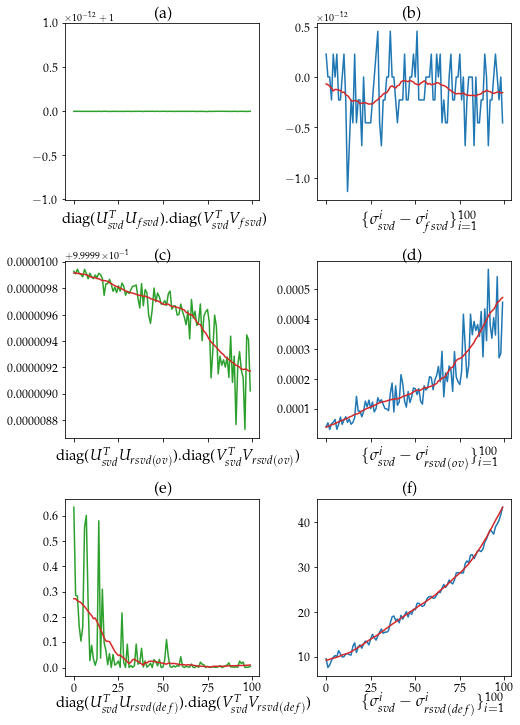

In [21]:
matrix_size_=[10000,10000,1000,100]

m=matrix_size_[0]
n=matrix_size_[1]
input_rank=matrix_size_[2]
rank=matrix_size_[3]

y_ax=np.zeros((8,rank), dtype=np.float64)

method_names=['fsvd','rsvd(ov)','rsvd(def)']
rank= desired_rank

y_ax[0]=futu*fvtv
y_ax[1]=fs_minus_s
y_ax[2]=r_k_utu*r_k_vtv
y_ax[3]=r_k_s_minus_s
y_ax[4]=r_uk_utu*r_uk_vtv
y_ax[5]=r_uk_s_minus_s


plotting6(y_ax,method_names,matrix_size_,'title1')
